# Energie des Todessternlasers
Mehrere Filmaufzeichnungen existieren, die die Schusskraft des imperialen Todessterns (wir sprechen hier über die erste Version, die in EP IV von einem Bauernlümmel vernichtet wurde) belegen.  
In den folgenden Zeilen möchte ich versuchen abzuschätzen, welche Energie der Todessternlaser aufbringen muss, um Ergebnisse wie auf Jedda (Rogue I) oder Alderaan (EP IV) zu erzielen.  
Dazu bediene ich mich des Konzeptes der Magnituden-Skala zur Abschätzung von Erdbebenstärken (und der von Erdbeben abgestrahlten Energie), der oberen Grenze dieser Skala, und dem Vergleich zur Energiedichte von Explosionen.  

Dieser Vergleich ist äußerst wichtig, da die Prozesse (wie z.B. Druckausbreitung) zwischen tektonischen Erdbeben (heißt, durch Aktivierung einer Störung) und Explosionen ziemlich unterschiedlich sind.

## Erdbeben und Momenten-Magnitude  
Erdbeben sind ein allgemein bekanntes Phänomen tektonisch aktiver Planetoide. Ebenso bekannt ist wahrscheinlich die [Richterskala](https://de.wikipedia.org/wiki/Richterskala) zur Bestimmung der Erdbebenstärke. Da diese direkt auf Amplitudenmessungen von Seismographen basiert, besteht das Problem, dass sie bei stärkeren Erbeben (und daher auch bei größeren Distanzen) nicht zuverlässig ist (da eine Sättigung bei höheren Magnituden eintritt).  

Daher nutzen wir hier die [Momenten-Magnituden-Skala](https://de.wikipedia.org/wiki/Momenten-Magnituden-Skala), welche direkt auf dem [Seismischen Moment](https://de.wikipedia.org/wiki/Seismisches_Moment) basiert.  

Das seismische Moment $M_0$ ist das Skalerprodukt aus dem Schermodul des Gesteins ($\mu$), der Bruchfläche ($A$), und der durchschnittlichen Verschiebung entlang der Bruchfläche ($u$):  

$$M_0 = \mu A u$$

Die darauf basierende Momenten-Magnitude ($M_W$) ist aufbauend auf der Oberflächenmagnitude ($M_S$) definiert als:  

$$log_{10}M_0 = 1.5 M_S + 9.1$$

$$M_W = \frac{2}{3}(log_{10}(M_0) - 9.1)$$  

Die freigesetzte seismische Energie $E_S$ in [J] kann wie folgt abgeschätzt werden:  

$$E_S = 10^{M_W 1.5 + 4.8}$$

In [4]:
# load dependencies
import pandas as p
import numpy as np
#from scipy.interpolate import interp1d

import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Daten
dat=p.read_csv('data/MomMag.csv')
dat

,Mw,Es [J],TNT [t],Nr Hiroshima
0,1,2.000000e+06,4.750000e-04,3.800000e-08
1,2,6.300000e+07,1.500000e-02,1.200000e-06
2,3,2.000000e+09,4.750000e-01,3.800000e-05
3,4,6.300000e+10,1.500000e+01,1.000000e-03
4,5,2.000000e+12,4.750000e+02,3.800000e-02
5,6,6.300000e+13,1.500000e+04,1.200000e+00
6,7,2.000000e+15,4.750000e+05,3.800000e+01
7,8,6.300000e+16,1.500000e+07,1.200000e+03
8,9,2.000000e+18,4.750000e+08,3.800000e+04


In [12]:
# Gleichung
mw = np.linspace(0,15,120)
Es = 10**(mw*1.5+4.8)

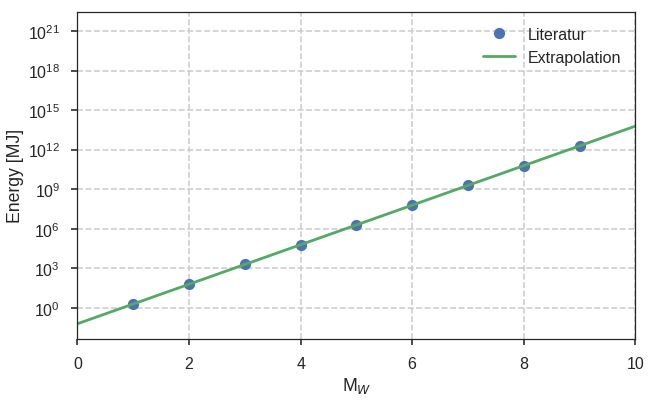

In [15]:
plt.figure(figsize=[10,6])
plt.semilogy(dat['Mw'],dat['Es [J]']/1e6,'o',label='Literatur')
plt.semilogy(mw,Es/1e6,'-',label='Extrapolation')
plt.grid(True,which="both",ls="--")
plt.grid(True, which='minor', ls='-',color='gray', linewidth=0.5)
plt.xlim([0,10])
plt.legend()
plt.ylabel('Energy [MJ]')
plt.xlabel('M$_W$')

## Abschätzung der Erdbebenstärke für Jedda und Alderaan
Versuchen wir einmal vorwärts abzuschätzen, wie groß das Seismische Moment für die beiden Planeten wäre (wir betrachten hier beide Planeten als vollständig homogen). Als mittleres Schermodul sowohl für Jedda, als auch Alderaan (felsische Planeten), nehmen wir einen standardmäßigen Wert der Erde: 30 GPa.  
Da wir keinerlei Aufzeichnungen von Seismographen haben, müssen wir Bruchfläche und Verschiebung abschätzen.  

#### Jedda  
Auf Jedda wurde der Todesstern nur zu Testzwecken eingesetzt, und der Planet besteht auch nach dem Schuss (vermutlich) weiter. Auch, wenn die Bilder des Films mit den ins All geschleuderten Gesteinsbrocken, anderes vermuten lassen. Vielleicht hätte man auch eine Vulkanerruption als Analog für den Todesstern heranziehen sollen...aber nun machen wir es über die Magnitude.  
Unsere Annahmen:  
* Den Imperialen wird es ausgereicht haben, Jedda einzuäschern. Also nehmen wir als Bruchfläche etwas an, was Jedda vollständig umfasst. Die Stadt ist elliptisch, wir entscheiden uns hier für die lange Achse, und schätzen diese mit 10 km ab. Da der Todesstern die Energie direkt an der Oberfläche freisetzt, nehmen wir als Bruchfläche einen Halbkreis (nach Unten in den Untergrund) an, dessen Radius also 5 km ist.  
* Die Verschiebung ist auch äußerst trickreich. Was wir auf Jedda sehen, ist eine Art "Krustentsunami", eine Welle aus Gestein, die sich ringförmig vom Zentrum des Todessternbeschusses ausbreitet. Bilder des Films deuten darauf hin, dass diese Welle mehrere hundert Meter weit hoch ist. Gesteins- und Trümmerstücke aus dem Zentrum des Einschlags fliegen fast bis zum Todesstern im Orbit hoch. Nehmen wir für die Verschiebung einfach mal 500 m an.  

#### Alderaan
Alderaan macht alles ein wenig einfacher. Der Planet existiert nach dem Beschuss des Todessterns nicht mehr. Das heißt, wir können ruhig in die Superlativen gehen, um die Energie des Beschusses abzuschätzen. Die Momenten-Magnituden Skala erreicht auf der Erde bei 10,6 ihr realistisches Maximum (prinzipiell geht sie immer weiter), da bei diesem Punkt die Erdkruste wohl komplett brechen würde. Die Energie, die auf Alderaan freigesetzt wurde, muss ungleich größer sein, denn der gesamte Planet wurde durch den Beschuss vernichtet.  
Unsere Annahmen:  
* Alderaan hat einen Durchmesser von 12500 km, etwas weniger als die Erde mit ca 12750 km . Nehmen wir an, die Bruchfläche durchzieht einmal den Planeten. Ist also eine Kreisfläche mit dem Radius von 6250 km.  
* Die Verschiebung lässt leider keinen wirklichen Anhalt zu (macht bei der Berechnung der Magnitude aber auch kaum mehr etwas aus..). Nehmen wir also an, mindestens die Kruste ist komplett verschoben. Sagen wir, Alderaan ist erdähnlich und besitzt eine mittlere Krustendicke von 30 km, die wir als Versatz annehmen.

In [10]:
# Berechnung seismisches Moment
# Jedda
mu = 30*10**9
# Annahme: Initiale Fläche der "Verschiebung" ist ein Halbkreis mit einem Durchmesser ca so groß wie die Stadt 
A = (np.pi*5000**2)/2
# Verschiebung: Abschätzung über die Höhe der initialen "Wand" aus Gestein
u = 500
M0 = mu*A*u
Mw_J = 2/3*(np.log10(M0)-9.1)
Es_J = 10**(1.5*Mw_J + 4.8)
H_J = 10**(1.5*Mw_J - 8.92)
print("Magnitude M$_W$ auf Jedda ist {}.".format(np.round(Mw_J,2)))
print("Also eine Energie von {} MJ, oder {} Hiroshima Bomben.".format(np.round(Es_J/1e6,2),np.round(H_J,0)))
# Alderaan
A_A = (np.pi*6250000**2)
u_A = 30000
M0_A = mu*A_A*u_A
Mw_A = 2/3*(np.log10(M0_A)-9.1)
Es_A = 10**(1.5*Mw_A + 4.8)
H_A = 10**(1.5*Mw_A - 8.92)
print("Magnitude M$_W$ auf Alderaan ist {}.".format(np.round(Mw_A,2)))
print("Also eine Energie von {} MJ, oder {} Hiroshima Bomben".format(np.round(Es_A/1e6,2),np.round(H_A,0)))

Magnitude M$_W$ auf Jedda ist 7.78.
Also eine Energie von 29522364960.68 MJ, oder 563.0 Hiroshima Bomben.
Magnitude M$_W$ auf Alderaan ist 13.3.
Also eine Energie von 5.535443430128112e+18 MJ, oder 105475700126.0 Hiroshima Bomben


7.78 auf der Momenten-Magnituden Skala scheint für Jedda nicht sonderlich hoch zu sein. Natürlich können wir uns bei den Annahmen vertan haben, müssen aber im Kopf behalten, dass sich diese Magnitude nicht auf ein Beben in mehreren Kilometern Tiefe bezieht, sondern auf eines, dessen Energie direkt an der Oberfläche freigesetzt würde.  
Bei Alderaan ist mit einer Magnitude über 13 wohl deutlich genug Energie aufgebracht worden, um den Planeten zu zerstören.

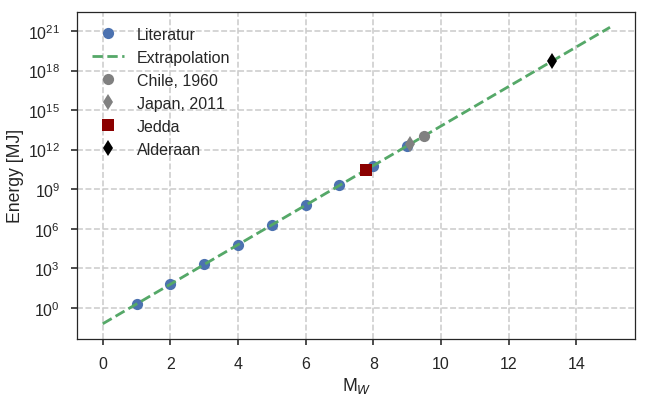

In [23]:
plt.figure(figsize=[10,6])
plt.semilogy(dat['Mw'],dat['Es [J]']/1e6,'o',label='Literatur')
plt.semilogy(mw,Es/1e6,'--',label='Extrapolation')
plt.semilogy(9.5, 10**(1.5*9.5+4.8)/1e6, 'o', label='Chile, 1960', color='gray')
plt.semilogy(9.1, 10**(1.5*9.1+4.8)/1e6, 'd', label='Japan, 2011', color='gray')
plt.semilogy(Mw_J, Es_J/1e6, 's', label='Jedda', color='darkred')
plt.semilogy(Mw_A, Es_A/1e6, 'd', label='Alderaan', color='black')
plt.grid(True,which="both",ls="--")
plt.grid(True, which='minor', ls='-',color='gray', linewidth=0.5)
plt.legend()
plt.ylabel('Energy [MJ]')
plt.xlabel('M$_W$')

## Energieträger Kyberkristalle


<hr>

<center> _"Only the strongest Stars have hearts of Kyber."_ [Chirrut Îmwe](http://starwars.wikia.com/wiki/Chirrut_%C3%8Emwe) </center>  

<hr>

Nehmen wir an, Chirrut bezieht sich wirklich auf Sterne, so könnten [Kyber Kristalle](http://starwars.wikia.com/wiki/Kyber_crystal), das Herz der Lichtschwerter und auch des Todessterns, aus _den stärksten Sternen_ kommen. Da folgt direkt die Frage, was diese _stärksten Sterne_ sein könnten.  
* junge (Hyper-)Riesen, wie [Deneb](https://de.wikipedia.org/wiki/Deneb) oder [R136a1]( https://de.wikipedia.org/wiki/R136a1), der ca zehn Millionen mal heller leuchtet als die Sonne?    
* alte massereiche Sterne, wie [Neutronensterne](https://de.wikipedia.org/wiki/Neutronenstern), die eine unvorstellbar hohe Dichte ( $4.8 10^{17}$ kg m$^{-1}$ ) haben?  

Die Suche nach einem stabilen Kristall bei einem Neutronenstern kann man schon nach wenigen Metern Tiefe aufgeben (bis in ca 10 m Tiefe bilden in einem Kristallgitter gebundene Eisenatomkerne und Elektronen die Kruste). Solche Eisenatomkernkristalle können auch noch in einer Tiefe von 2 km gefunden werden.
Aber bei einer Dichte, die ein Tausendstel eines Atomkerns annähert, könnten solche Kristalle sicherlich kaum am Hals (siehe [Rogue One](http://www.imdb.com/title/tt3748528/)) getragen werden, oder im Lichtschwert verpackt am Gürtel.  

Auf Suchen im Internet bin ich auf eine [weitere Erklärung](https://scifi.stackexchange.com/questions/160998/what-does-chirrut-mean-by-the-strongest-stars-have-hearts-of-kyber) gestoßen, die fiktiven Kyber Kristalle in unsere Realität zu übersetzen....  
Kurzfassung:  
* Die Sterne, die gemeint sein könnten, könnten Weiße Zwerge sein  
* Weiße Zwerge weisen auch schon eine beachtliche Dichte auf (ein Teelöffel, also 5 cm$^3$, wiegen gut 5 Tonnen ).
* Berücksichtigt man zum Kristallaufbau aber nur Elektronen der [entarteten Materie](https://de.wikipedia.org/wiki/Entartete_Materie) eines weißen Zwerges, wögen 5 cm$^3$ so viel wie ein ordentliches Steak, um die 230 Gramm.  
* Dies hieße, dass das Kristallmaterial nur aus einer Elektronenmatrix bestünden, die zur Hälfte aus positiv geladenen Antimateriepositronen besteht. In diesem 50/50 Gleichgewicht könnte diese dichte Kristallmatrix stabil sein.  

Selbstverständlich sind das alles recht abstruse Hypothesen, aber angenommen, wir haben einen Solch dichten Kristall, der sich polarisieren lässt. Hinweise dafür findet man im Buch _Catalyst: A Rogue One Novel_:  
_"He held the crystal up to the light of the displays, marveling at the kyber's mix of transparency and opacity - characteristics the ancient Jedi had referred to as 'the water of the kyber'.  The energy potential was given; his team had proven as much in their earliest piezoelectric experiments."_  
Folglich tritt in Kyberkristallen eine starke elektrische Spannung auf, wenn diese elastisch verformt werden (siehe [Piezoelektrischer Effekt](https://de.wikipedia.org/wiki/Piezoelektrizit%C3%A4t)).

Todo:  
* Magnitude ranges of earthquakes 
* Relate magnitudes to energy needed    
* relate energy needed to come from the crystals either piezo or implosion of deranged electron crystal